# Purpose: demonstrate exact inference

This is a dummy Bayesian belief network (BBN) to demonstrate exact inference. We need to first specify the BBN; define the structure, which is a directed acyclic graph (DAG), and the parameters, which are local probability models represented by conditional probability tables (CPTs).

In [1]:
from pybbn.graph.dag import Bbn
from pybbn.graph.edge import Edge, EdgeType
from pybbn.graph.jointree import EvidenceBuilder
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.pptc.inferencecontroller import InferenceController

# create the nodes
a = BbnNode(Variable(0, 'a', ['on', 'off']), [0.5, 0.5])
b = BbnNode(Variable(1, 'b', ['on', 'off']), [0.5, 0.5, 0.4, 0.6])
c = BbnNode(Variable(2, 'c', ['on', 'off']), [0.7, 0.3, 0.2, 0.8])
d = BbnNode(Variable(3, 'd', ['on', 'off']), [0.9, 0.1, 0.5, 0.5])
e = BbnNode(Variable(4, 'e', ['on', 'off']), [0.3, 0.7, 0.6, 0.4])
f = BbnNode(Variable(5, 'f', ['on', 'off']), [0.01, 0.99, 0.01, 0.99, 0.01, 0.99, 0.99, 0.01])
g = BbnNode(Variable(6, 'g', ['on', 'off']), [0.8, 0.2, 0.1, 0.9])
h = BbnNode(Variable(7, 'h', ['on', 'off']), [0.05, 0.95, 0.95, 0.05, 0.95, 0.05, 0.95, 0.05])

# create the network structure
bbn = Bbn() \
    .add_node(a) \
    .add_node(b) \
    .add_node(c) \
    .add_node(d) \
    .add_node(e) \
    .add_node(f) \
    .add_node(g) \
    .add_node(h) \
    .add_edge(Edge(a, b, EdgeType.DIRECTED)) \
    .add_edge(Edge(a, c, EdgeType.DIRECTED)) \
    .add_edge(Edge(b, d, EdgeType.DIRECTED)) \
    .add_edge(Edge(c, e, EdgeType.DIRECTED)) \
    .add_edge(Edge(d, f, EdgeType.DIRECTED)) \
    .add_edge(Edge(e, f, EdgeType.DIRECTED)) \
    .add_edge(Edge(c, g, EdgeType.DIRECTED)) \
    .add_edge(Edge(e, h, EdgeType.DIRECTED)) \
    .add_edge(Edge(g, h, EdgeType.DIRECTED))

# Visualize the structure

Text(0.5,1,'BBN DAG')

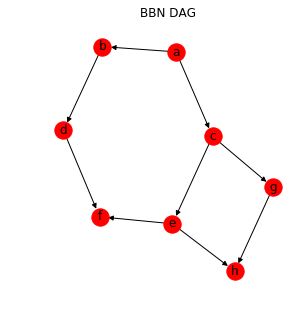

In [2]:
%matplotlib inline
from pybbn.generator.bbngenerator import convert_for_drawing
import matplotlib.pyplot as plt
import networkx as nx

graph = convert_for_drawing(bbn)
pos = nx.nx_agraph.graphviz_layout(graph, prog='neato')

plt.figure(figsize=(10, 5))
plt.subplot(121) 
labels = dict([(k, node.variable.name) for k, node in bbn.nodes.iteritems()])
nx.draw(graph, pos=pos, with_labels=True, labels=labels)
plt.title('BBN DAG')

# Perform exact inference with observation

In [3]:
 # convert the BBN to a join tree
join_tree = InferenceController.apply(bbn)

# insert an observation evidence
ev = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name('a')) \
    .with_evidence('on', 1.0) \
    .build()
join_tree.set_observation(ev)

# print the marginal probabilities
for node in join_tree.get_bbn_nodes():
    potential = join_tree.get_bbn_potential(node)
    print(node)
    print(potential)
    print('>')

0|a|on,off
0=on|1.0
0=off|0.0
>
1|b|on,off
1=on|0.5
1=off|0.5
>
2|c|on,off
2=on|0.7
2=off|0.3
>
3|d|on,off
3=on|0.7
3=off|0.3
>
4|e|on,off
4=on|0.39
4=off|0.61
>
5|f|on,off
5=on|0.18934
5=off|0.81066
>
6|g|on,off
6=on|0.59
6=off|0.41
>
7|h|on,off
7=on|0.7826
7=off|0.2174
>
